# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [70]:
#Import all the necessary modules

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [71]:
# Create a python list of column names called "names"
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#while reading the data, supply the "colnames" list
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [72]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [73]:
print(pima_df.dtypes)

print(pima_df.shape)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [74]:
#pima_df = pima_df.fillna(pima_df.median())
#pima_df.head()

#pima_dfx=pima_df.drop('class',axis=1)
#pima_dfx=pima_df.replace(to_replace=0,value=pima_df.median())
pima_df['plas'] = pima_df['plas'].replace(0,pima_df['plas'].median())
pima_df['skin'] = pima_df['skin'].replace(0,pima_df['skin'].median())
pima_df['pres'] = pima_df['pres'].replace(0,pima_df['pres'].median())
pima_df['mass'] = pima_df['mass'].replace(0,pima_df['mass'].median())
pima_df['age'] = pima_df['age'].replace(0,pima_df['age'].median())
pima_df['test'] = pima_df['test'].replace(0,pima_df['test'].median())

pima_df.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [75]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

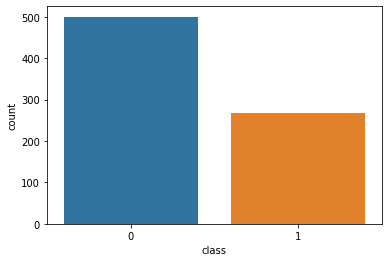

In [76]:
sns.countplot(x='class',data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


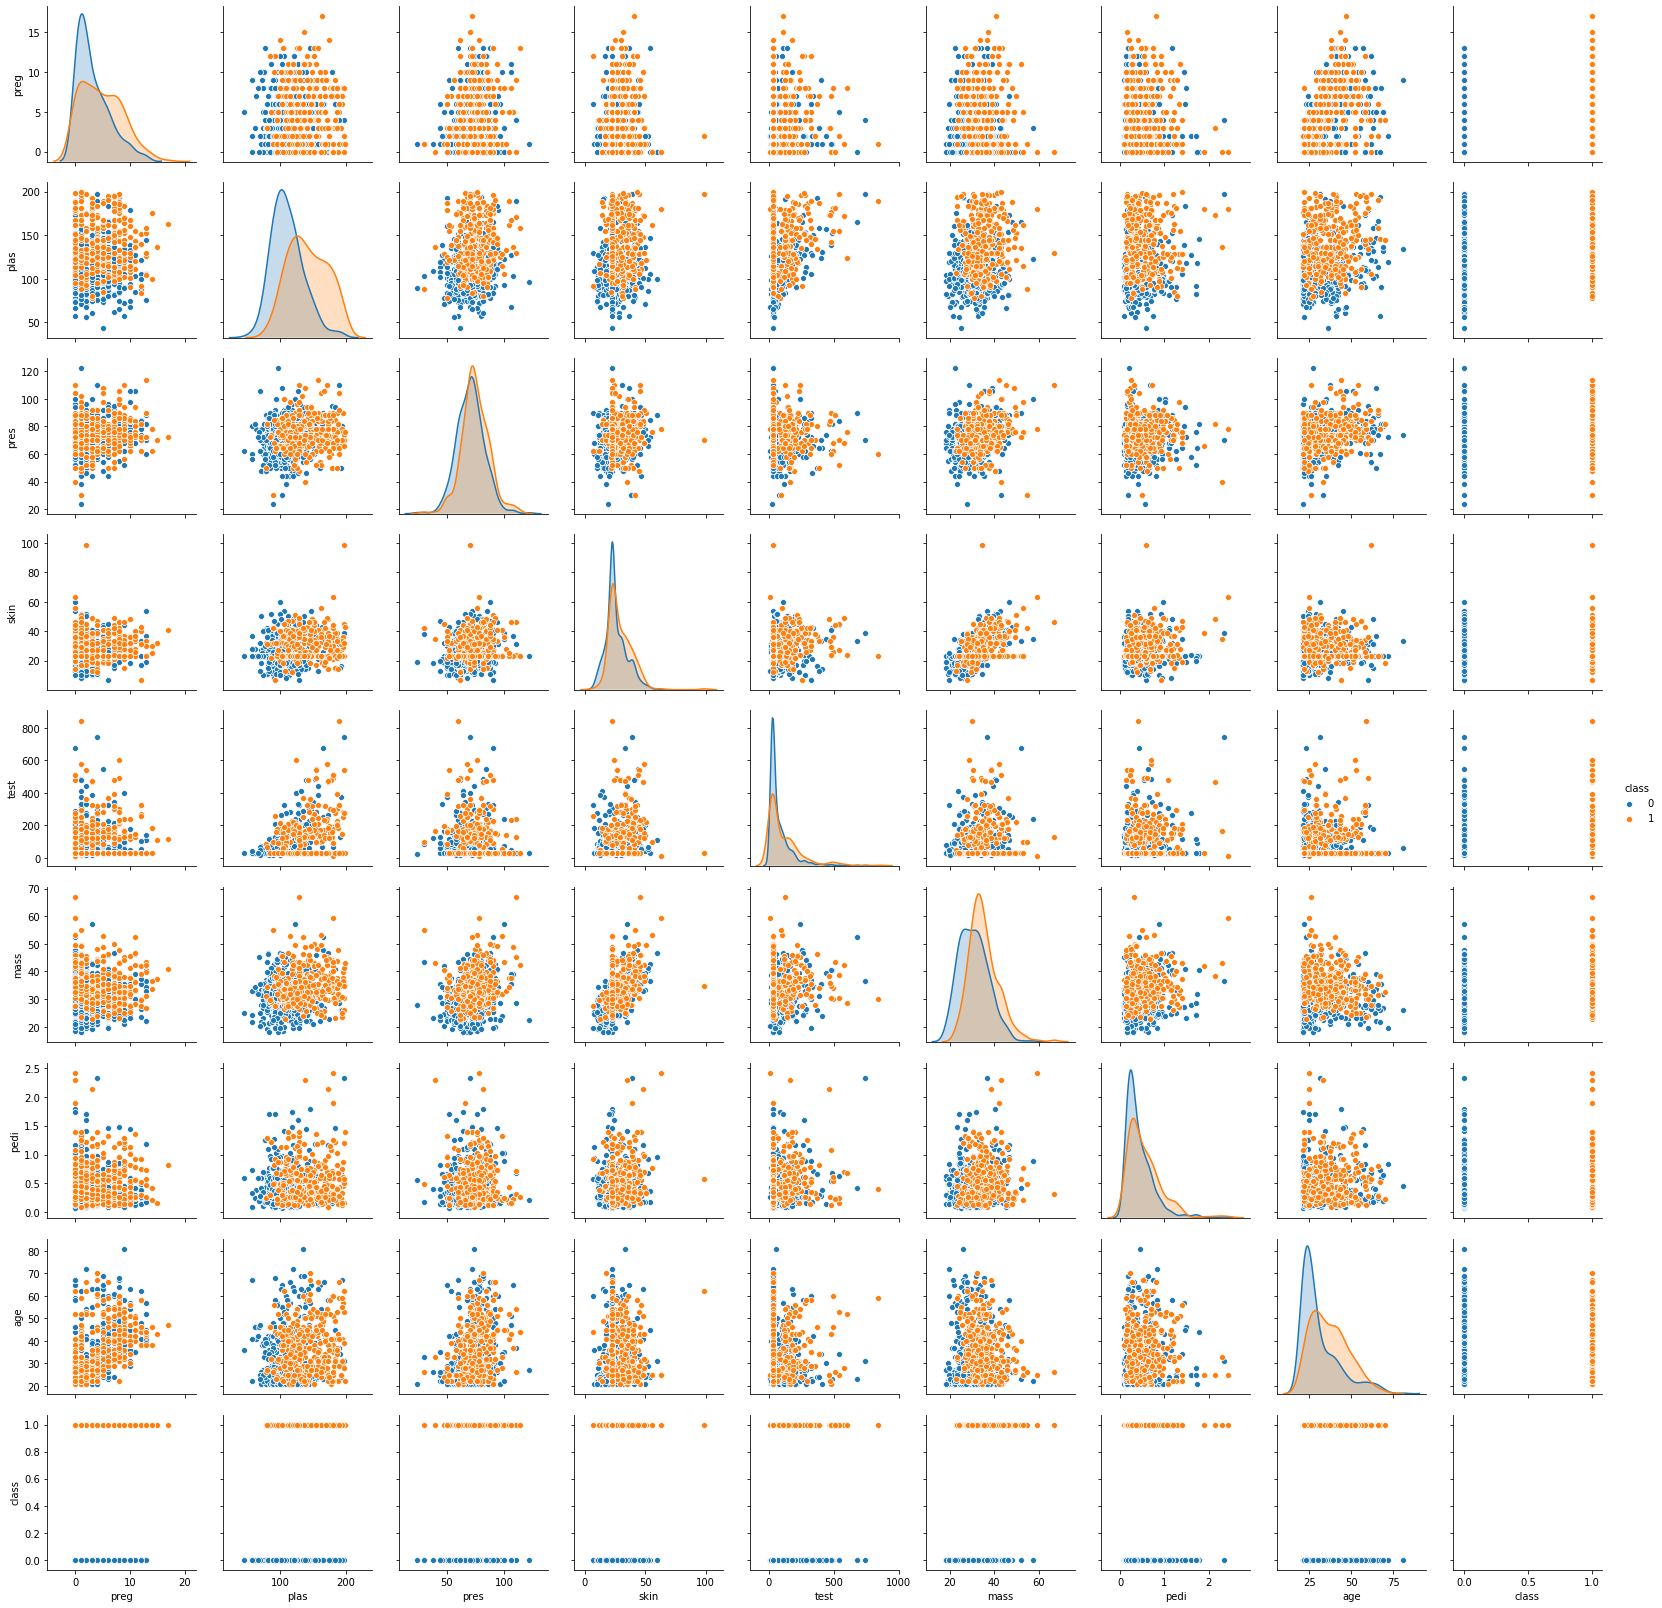

In [77]:
sns.pairplot(pima_df,hue='class')

In [78]:
#Since its quite visible that plasma is a quite dominating variable to find diabetic and non diabetic

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [95]:
# Copy all the predictor variables into X dataframe. Since 'Class' is dependent variable drop it
X = pima_df.drop('class', axis=1)

# Copy the 'class' column alone into the y dataframe. This is the dependent variable
y = pima_df[['class']]

In [96]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train

,preg,plas,pres,skin,test,mass,pedi,age
88,15,136,70,32,110.0,37.1,0.153,43
467,0,97,64,36,100.0,36.8,0.600,25
550,1,116,70,28,30.5,27.4,0.204,21
147,2,106,64,35,119.0,30.5,1.400,34
481,0,123,88,37,30.5,35.2,0.197,29
412,1,143,84,23,310.0,42.4,1.076,22
248,9,124,70,33,402.0,35.4,0.282,34
642,6,147,80,23,30.5,29.5,0.178,50
519,6,129,90,7,326.0,19.6,0.582,60
730,3,130,78,23,79.0,28.4,0.323,34


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [90]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [91]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
preg  0.123302
plas  0.235529
pres  0.152560
skin  0.047546
test  0.007303
mass  0.204364
pedi  0.106892
age   0.122504


In [92]:
dt_model.score(X_test , y_test)

0.7359307359307359

In [94]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[112  34]
 [ 27  58]]


Print the feature importance of the decision model - Optional

In [100]:
dt_model.feature_importances_

array([0.12330221, 0.23552852, 0.15255954, 0.04754623, 0.00730326,
       0.20436423, 0.10689182, 0.12250419])